In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import datetime
import math

In [3]:
dataPrueba = pd.read_csv('/home/user/machinelearning/imida/data/AL41.csv', sep=';')
fechas = []
for x in dataPrueba['FECHA']:
    fechas.append(datetime.datetime.strptime(x, '%d/%m/%Y').date())
dataPrueba['FECHA_2'] = fechas

In [4]:
dataPrueba.replace(',', '.', regex=True, inplace=True)
dataPrueba = dataPrueba.astype(str)   #Pasamos todo a String
for variable in dataPrueba:
    for x in dataPrueba[variable]:
        if('.' in x):   #Sería mejor una expresión regular del estilo [0-9]*[.][0-9]+
            #Si encontramos una variable con un punto, significa que es un float, por lo que lo pasamos a float
            dataPrueba[variable] = dataPrueba[variable].astype(float)
            break   #Con detectar una nos vale para cambiar toda la columna
dataPrueba.dtypes


CODEST         object
FECHA          object
VVMED         float64
VVMAX         float64
RVIENTO       float64
DVMED         float64
TMIN          float64
TMAX          float64
TMED          float64
TMINABS       float64
TMAXABS       float64
HRMIN         float64
HRMAX         float64
HRMED         float64
HRMINABS      float64
HRMAXABS      float64
RADMED        float64
RADMAX        float64
HSOL          float64
PREC          float64
HORAS0        float64
HORAS7        float64
DEWPT         float64
DPV           float64
ETO_PM_FAO    float64
FECHA_2        object
dtype: object

In [5]:
def linea_null(fecha):
    return "AL41," + fecha + ",,,,,,,,,,,,,,,,,,,,,\n"

def linea_completa(data):
    stri = "AL41," + data.iloc[:,1:2].values[0][0] + ","
    for x in range(2,24):
        if math.isnan(data.iloc[:,x:x+1].values[0][0]):
            stri+=","
        else:
            stri+=str(data.iloc[:,x:x+1].values[0][0]) + ","
    if math.isnan(data.iloc[:,24:25].values[0][0]):
        stri+="\n"
    else:
        stri+=str(data.iloc[:,24:25].values[0][0]) + "\n"
    return stri
'''
def linea_completa(data):
    print(data)
    stri = "AL41," + data['FECHA'][0] + ","
    for x in data.columns:
        if x != 'CODEST' and x != 'FECHA':
            if x == 'ETO_PM_FAO':
                if math.isnan(data[x][0]):
                    stri+="\n"
                else:
                    stri+=str(data[x][0]) + "\n"
                break
            if math.isnan(data[x][0]):
                stri+=","
            else:
                stri+=str(data[x][0]) + ","
    stri+="\n"
    return stri
    '''

'\ndef linea_completa(data):\n    print(data)\n    stri = "AL41," + data[\'FECHA\'][0] + ","\n    for x in data.columns:\n        if x != \'CODEST\' and x != \'FECHA\':\n            if x == \'ETO_PM_FAO\':\n                if math.isnan(data[x][0]):\n                    stri+="\n"\n                else:\n                    stri+=str(data[x][0]) + "\n"\n                break\n            if math.isnan(data[x][0]):\n                stri+=","\n            else:\n                stri+=str(data[x][0]) + ","\n    stri+="\n"\n    return stri\n    '

In [6]:
f = open("/home/user/machinelearning/imida/data/AL41_2.csv", "w")
for variable in dataPrueba.columns:
    if variable != 'ETO_PM_FAO':
        f.write(variable + ",")
    else:
        f.write(variable + "\n")
        break
year = 1994
while (year <= 2021):
    for month in range(1,13):
        if (month > 2 and year == 2021):
            break
        if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
            for day in range(1,32):
                if (day<10):
                        strday = "0"+str(day)
                else:
                    strday = str(day)
                if (month<10):
                    strmonth = "0"+str(month)
                else:
                    strmonth = str(month)
                date = strday+"/"+strmonth+"/"+str(year)
                if (dataPrueba[dataPrueba['FECHA'] == date].empty):
                    f.write(linea_null(date))
                else:
                    f.write(linea_completa(dataPrueba[dataPrueba['FECHA'] == date]))
        elif month == 2:
            if (year % 4 == 0):
                for day in range (1,30):
                    if (day<10):
                        strday = "0"+str(day)
                    else:
                        strday = str(day)
                    if (month<10):
                        strmonth = "0"+str(month)
                    else:
                        strmonth = str(month)
                    date = strday+"/"+strmonth+"/"+str(year)
                    if (dataPrueba[dataPrueba['FECHA'] == date].empty):
                        f.write(linea_null(date))
                    else:
                        f.write(linea_completa(dataPrueba[dataPrueba['FECHA'] == date]))
            else:
                for day in range (1,29):
                    if (day > 9 and year == 2021):
                        break
                    if (day<10):
                        strday = "0"+str(day)
                    else:
                        strday = str(day)
                    if (month<10):
                        strmonth = "0"+str(month)
                    else:
                        strmonth = str(month)
                    date = strday+"/"+strmonth+"/"+str(year)
                    if (dataPrueba[dataPrueba['FECHA'] == date].empty):
                        f.write(linea_null(date))
                    else:
                        f.write(linea_completa(dataPrueba[dataPrueba['FECHA'] == date]))
        else:
            for day in range(1,31):
                if (day<10):
                    strday = "0"+str(day)
                else:
                    strday = str(day)
                if (month<10):
                    strmonth = "0"+str(month)
                else:
                    strmonth = str(month)
                date = strday+"/"+strmonth+"/"+str(year)
                if (dataPrueba[dataPrueba['FECHA'] == date].empty):
                    f.write(linea_null(date))
                else:
                    f.write(linea_completa(dataPrueba[dataPrueba['FECHA'] == date]))
    year+=1
f.close()

In [7]:
'''
year = 1994
while (year <= 2021):
    for month in range(1,13):
        if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
            for day in range(1,32):
                if (day<10):
                        strday = "0"+str(day)
                else:
                    strday = str(day)
                if (month<10):
                    strmonth = "0"+str(month)
                else:
                    strmonth = str(month)
                print(strday+"/"+strmonth+"/"+str(year))
        elif month == 2:
            if (year % 4 == 0):
                for day in range (1,30):
                    if (day<10):
                        strday = "0"+str(day)
                    else:
                        strday = str(day)
                    if (month<10):
                        strmonth = "0"+str(month)
                    else:
                        strmonth = str(month)
                    print(strday+"/"+strmonth+"/"+str(year))
            else:
                for day in range (1,29):
                    if (day<10):
                        strday = "0"+str(day)
                    else:
                        strday = str(day)
                    if (month<10):
                        strmonth = "0"+str(month)
                    else:
                        strmonth = str(month)
                    print(strday+"/"+strmonth+"/"+str(year))
        else:
            for day in range(1,31):
                if (day<10):
                    strday = "0"+str(day)
                else:
                    strday = str(day)
                if (month<10):
                    strmonth = "0"+str(month)
                else:
                    strmonth = str(month)
                print(strday+"/"+strmonth+"/"+str(year))
    year+=1
'''
    

'\nyear = 1994\nwhile (year <= 2021):\n    for month in range(1,13):\n        if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:\n            for day in range(1,32):\n                if (day<10):\n                        strday = "0"+str(day)\n                else:\n                    strday = str(day)\n                if (month<10):\n                    strmonth = "0"+str(month)\n                else:\n                    strmonth = str(month)\n                print(strday+"/"+strmonth+"/"+str(year))\n        elif month == 2:\n            if (year % 4 == 0):\n                for day in range (1,30):\n                    if (day<10):\n                        strday = "0"+str(day)\n                    else:\n                        strday = str(day)\n                    if (month<10):\n                        strmonth = "0"+str(month)\n                    else:\n                        strmonth = str(month)\n                    print(st

In [8]:
datosBuenos = pd.read_csv('/home/user/machinelearning/imida/data/AL41_2.csv')
datosBuenos.shape

(9902, 25)

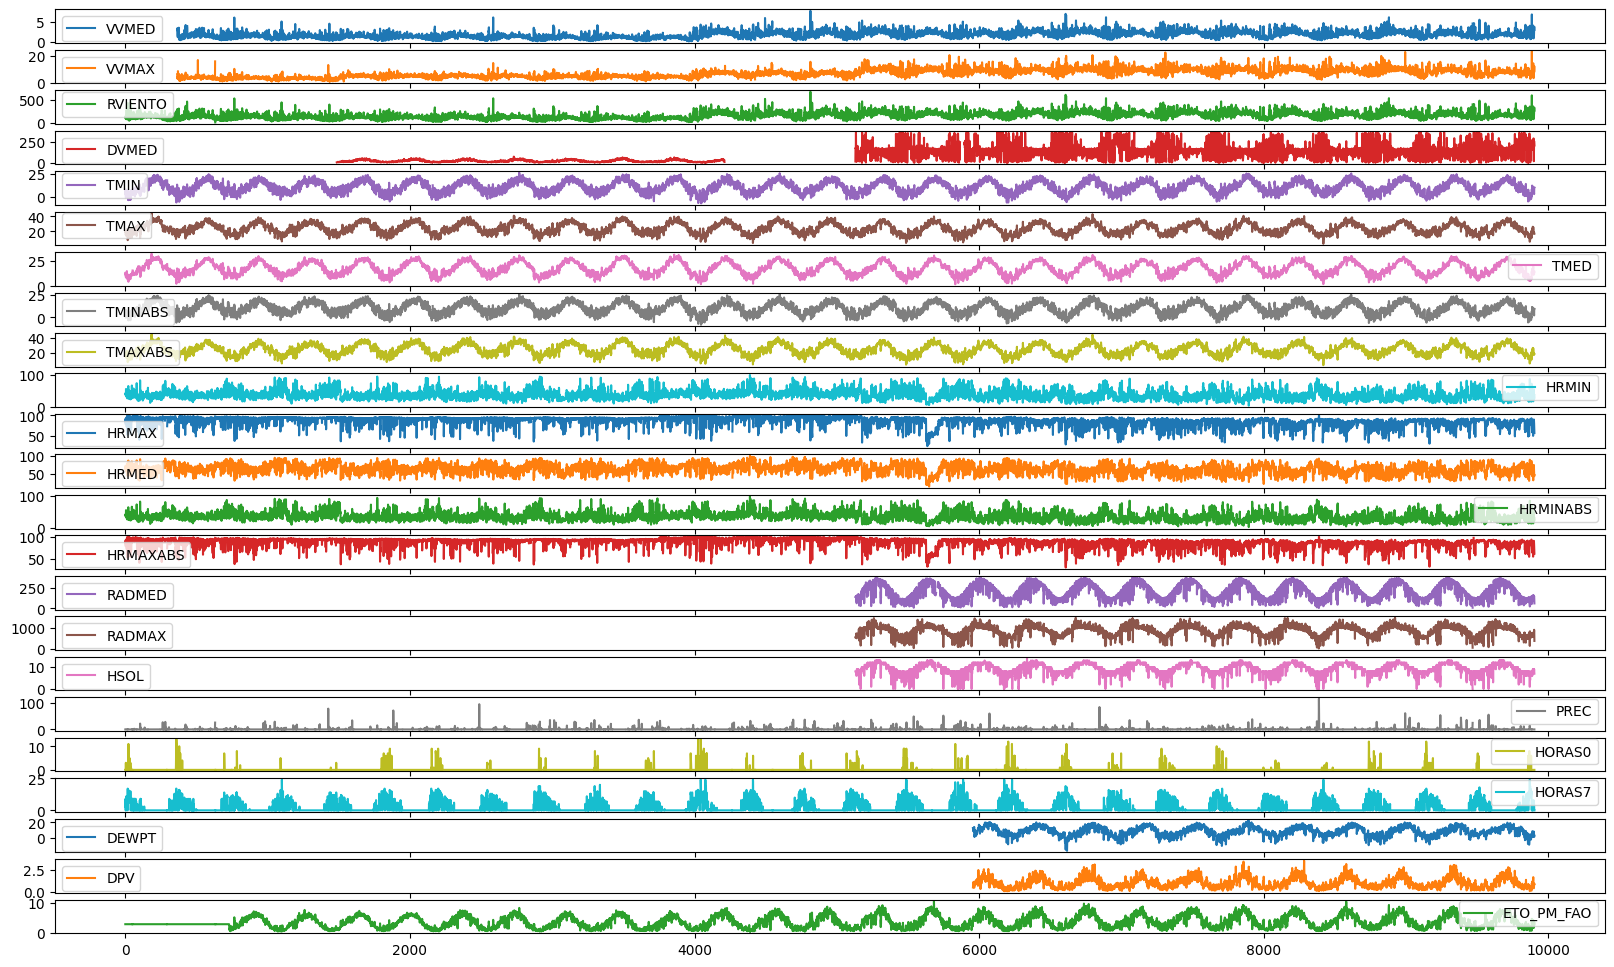

In [9]:
datosBuenos.drop(['CODEST', 'FECHA'], axis=1).plot(subplots=True, figsize=(20,12))
plt.show()

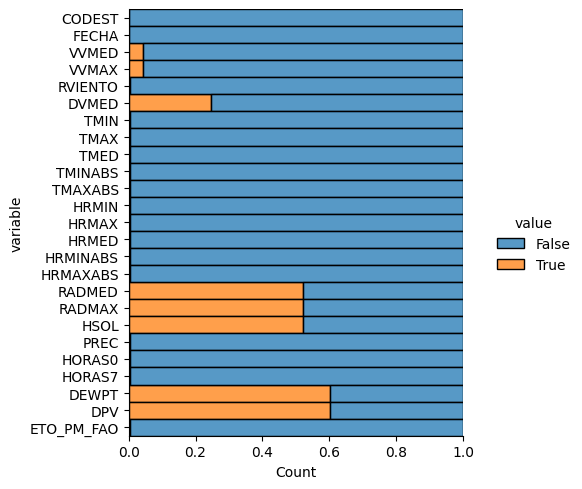

In [10]:
datosBuenos.isnull().melt().pipe(lambda df: (sns.displot(data=df, y='variable', hue='value', multiple='fill')))

In [11]:
datosBuenos.head(4)

,CODEST,FECHA,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,...,HRMAXABS,RADMED,RADMAX,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO
0,AL41,01/01/1994,NaN,NaN,121.68,NaN,5.9,19.1,12.87,5.9,...,86.7,NaN,NaN,NaN,0.0,0.0,3.0,NaN,NaN,2.928228
1,AL41,02/01/1994,NaN,NaN,104.76,NaN,2.9,20.8,11.75,2.9,...,84.5,NaN,NaN,NaN,0.0,0.0,9.0,NaN,NaN,2.928228
2,AL41,03/01/1994,NaN,NaN,94.32,NaN,2.8,19.4,10.56,2.8,...,92.1,NaN,NaN,NaN,0.0,0.0,8.0,NaN,NaN,2.928228
3,AL41,04/01/1994,NaN,NaN,153.36,NaN,8.3,15.6,12.20,8.3,...,78.6,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,2.928228


Añadir columna con fechas de otro tipo

In [12]:
fechas = []
for x in datosBuenos['FECHA']:
    fechas.append(datetime.datetime.strptime(x, '%d/%m/%Y').date())
datosBuenos['FECHA_2'] = fechas
datosBuenos.head(4)

,CODEST,FECHA,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,...,RADMED,RADMAX,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO,FECHA_2
0,AL41,01/01/1994,NaN,NaN,121.68,NaN,5.9,19.1,12.87,5.9,...,NaN,NaN,NaN,0.0,0.0,3.0,NaN,NaN,2.928228,1994-01-01
1,AL41,02/01/1994,NaN,NaN,104.76,NaN,2.9,20.8,11.75,2.9,...,NaN,NaN,NaN,0.0,0.0,9.0,NaN,NaN,2.928228,1994-01-02
2,AL41,03/01/1994,NaN,NaN,94.32,NaN,2.8,19.4,10.56,2.8,...,NaN,NaN,NaN,0.0,0.0,8.0,NaN,NaN,2.928228,1994-01-03
3,AL41,04/01/1994,NaN,NaN,153.36,NaN,8.3,15.6,12.20,8.3,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,2.928228,1994-01-04


Añadir columna año

In [13]:
years = []
for x in datosBuenos['FECHA_2'].values:
    years.append(int(str(x)[0:4]))
datosBuenos['AÑO'] = years
datosBuenos.head(5)

,CODEST,FECHA,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,...,RADMAX,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO,FECHA_2,AÑO
0,AL41,01/01/1994,NaN,NaN,121.68,NaN,5.9,19.1,12.87,5.9,...,NaN,NaN,0.0,0.0,3.0,NaN,NaN,2.928228,1994-01-01,1994
1,AL41,02/01/1994,NaN,NaN,104.76,NaN,2.9,20.8,11.75,2.9,...,NaN,NaN,0.0,0.0,9.0,NaN,NaN,2.928228,1994-01-02,1994
2,AL41,03/01/1994,NaN,NaN,94.32,NaN,2.8,19.4,10.56,2.8,...,NaN,NaN,0.0,0.0,8.0,NaN,NaN,2.928228,1994-01-03,1994
3,AL41,04/01/1994,NaN,NaN,153.36,NaN,8.3,15.6,12.20,8.3,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,2.928228,1994-01-04,1994
4,AL41,05/01/1994,NaN,NaN,151.92,NaN,-0.4,16.1,8.55,-0.4,...,NaN,NaN,0.0,3.0,8.0,NaN,NaN,2.928228,1994-01-05,1994


Añadir columna estación

In [14]:
estaciones=[]
for x in datosBuenos['FECHA_2'].values:
    if(int(str(x)[5:7]) < 3):
        estaciones.append('INVIERNO')
    elif(int(str(x)[5:7]) == 3):
        if(int(str(x)[8:10]) <= 20):
            estaciones.append('INVIERNO')
        else:
            estaciones.append('PRIMAVERA')
    elif(int(str(x)[5:7]) < 6):
        estaciones.append('PRIMAVERA')
    elif(int(str(x)[5:7]) == 6):
        if(int(str(x)[8:10]) <= 20):
            estaciones.append('PRIMAVERA')
        else:
            estaciones.append('VERANO')
    elif(int(str(x)[5:7]) < 9):
        estaciones.append('VERANO')
    elif(int(str(x)[5:7]) == 9):
        if(int(str(x)[8:10]) <= 22):
            estaciones.append('VERANO')
        else:
            estaciones.append('OTOÑO')
    elif(int(str(x)[5:7]) < 12):
        estaciones.append('OTOÑO')
    else:
        if(int(str(x)[8:10]) >= 22):
            estaciones.append('INVIERNO')
        else:
            estaciones.append('OTOÑO')
datosBuenos['ESTACION'] = estaciones
datosBuenos.head(4)

,CODEST,FECHA,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,...,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO,FECHA_2,AÑO,ESTACION
0,AL41,01/01/1994,NaN,NaN,121.68,NaN,5.9,19.1,12.87,5.9,...,NaN,0.0,0.0,3.0,NaN,NaN,2.928228,1994-01-01,1994,INVIERNO
1,AL41,02/01/1994,NaN,NaN,104.76,NaN,2.9,20.8,11.75,2.9,...,NaN,0.0,0.0,9.0,NaN,NaN,2.928228,1994-01-02,1994,INVIERNO
2,AL41,03/01/1994,NaN,NaN,94.32,NaN,2.8,19.4,10.56,2.8,...,NaN,0.0,0.0,8.0,NaN,NaN,2.928228,1994-01-03,1994,INVIERNO
3,AL41,04/01/1994,NaN,NaN,153.36,NaN,8.3,15.6,12.20,8.3,...,NaN,0.0,0.0,0.0,NaN,NaN,2.928228,1994-01-04,1994,INVIERNO


Guardar DataSet

In [15]:
datosBuenos.to_csv('/home/user/machinelearning/imida/data/AL41_todas_fechas.csv', index=False)